In [1]:
from PIL import Image, ImageDraw, ImageFont
import torch, time, os
from google.colab import drive
from IPython.display import clear_output

In [ ]:
try:
    from google.colab import drive # Load Google Drive files.
    drive.mount('/content/drive', force_remount=True)
    projectPath = '/content/drive/Shareddrives/DeepLearning/FinalProject/'
except ModuleNotFoundError:
    projectPath = os.getcwd() + '/'

In [3]:
def extractFace(IMG, FaceDetector, threshold=0.50):
    extractedFaces = []
    FaceDetections = FaceDetector(IMG).pandas().xyxy[0]
    for detection in FaceDetections.values:
        xmin, ymin, xmax, ymax, confidence = detection[:5]
        if confidence >= threshold:
            bb = [(xmin, ymin), (xmax, ymax)]
            w, h = xmax - xmin, ymax - ymin
            currentFace = IMG.crop((xmin, ymin, w+xmin, h+ymin))
            extractedFaces.append(currentFace)

    return extractedFaces

In [ ]:
MyModel = torch.hub.load('ultralytics/yolov5', 'custom', projectPath+'Models/YOLO/Best.onnx', _verbose=False)
MyModel.cuda();

In [7]:
IMG = Image.open(projectPath+'DATA/WIDER_TEST/Image1.jpg')
t0 = time.time()
faces = extractFace(IMG, MyModel)
tt = time.time() - t0
if len(faces) == 1:
    print(f"Extracted {len(faces)} in face {round(tt, 5)} seconds.")
else:
    print(f"Extracted {len(faces)} in faces {round(tt, 5)} seconds.")

Extracted 1 in face 0.04502 seconds.


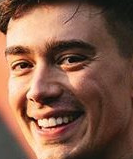

In [8]:
faces[0]

## Perform Detections & Export

In [ ]:
Images = projectPath+'DATA/WIDER_TEST'
Results = projectPath+'DATA/Results'
i, n = 0, len(os.listdir(Images))
for imageName in os.listdir(Images):
    imagePath = Images + '/' + imageName

    IMG = Image.open(imagePath)
    FaceDetections = MyModel(IMG).pandas().xyxy[0]

    for detection in FaceDetections.values:
        xmin, ymin, xmax, ymax, confidence = detection[:5]
        if confidence >= 0.35:
            bb = [(xmin, ymin), (xmax, ymax)]
            w = xmax - xmin
            IMG_ = ImageDraw.Draw(IMG)
            IMG_.rectangle(bb, outline ="Red", width=2)

            Text = ImageDraw.Draw(IMG)
            Text.text((xmin+5, ymin+2), 
                      str(round(confidence, 3)), 
                      fill=(255, 0, 0))

    IMG.save(projectPath+'DATA/Results' + '/' + imageName.replace('jpg', 'png'))
    i+=1
    clear_output(wait=True)
    print(f"Image {i}/{n}")

Image 16/16
